Nama: Yusuf Niko Fitranto

NIM: 1306620033 

Kelas: Fisika A 2020  

Tugas 2 PENGOLAHAN CITRA DIGITAL

In [4]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from google.colab.patches import cv2_imshow 
from matplotlib import pyplot as plt

# GAMBAR ASLI

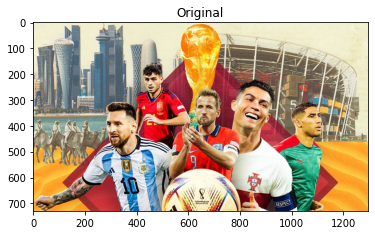

In [6]:
img = Image.open('/content/wc.jpg')
plt.title('Original')
plt.imshow(img)

# GRAYSCALE

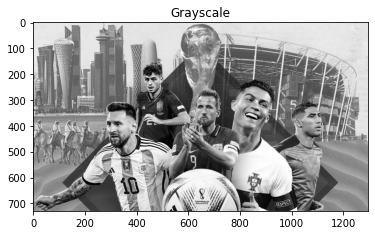

In [7]:
grayImg = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY);
plt.title('Grayscale')
plt.imshow(grayImg, cmap='gray')

# FFT Spectrum

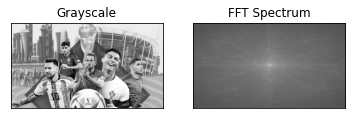

In [9]:
img = cv2.imread('/content/wc.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Grayscale'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('FFT Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# PHASE SPECTRUM

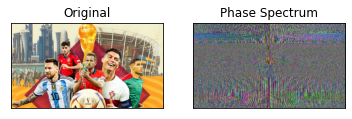

In [11]:
img = Image.open('/content/wc.jpg')
grayImg = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)
phase_spectrum = np.angle(dft_shift)

ax1 = plt.subplot(1,2,1)
ax1.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

ax2 = plt.subplot(1,2,2)
ax2.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

# INVERS FFT

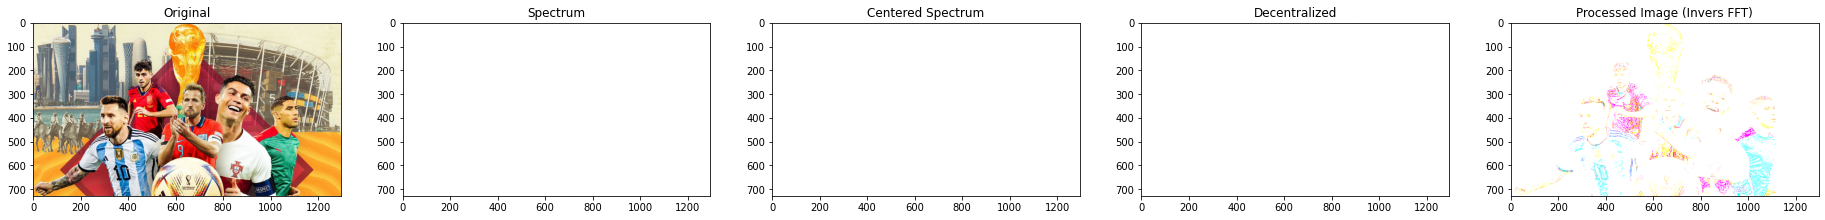

In [12]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image (Invers FFT)")

plt.show()

# VARIASI THRESHOLD

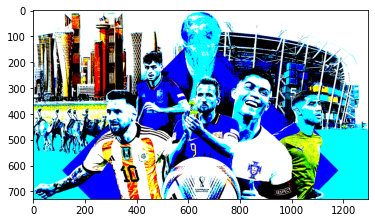

In [13]:
img = cv2.imread('/content/wc.jpg')
# Define a threshold, 128 is the middle of black and white in grey scale
thresh = 128
# Threshold the image
img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]
# Save image
cv2.imwrite('/content/wc.jpg',img)
plt.imshow(img)


# INVERS FFT

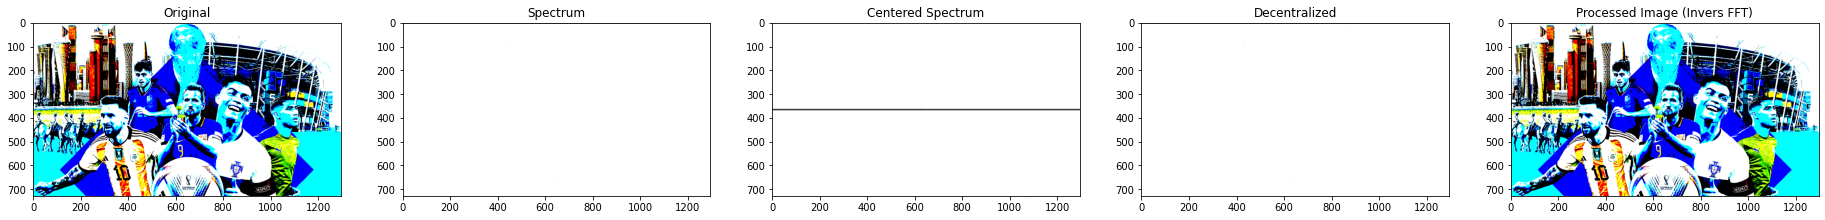

In [14]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(131), plt.imshow(img, "gray"), plt.title("Asli")

img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image (Invers FFT)")

plt.show()